In [19]:
from IPython.display import SVG
from keras.utils.visualize_util import model_to_dot
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import SGD, Adagrad
from __future__ import division

import numpy as np
import os


import cPickle as pickle


name = "targetSubsample.pickle"
with open(name, 'rb') as f:
    y = pickle.load(f)
    
name = "trainSubsample.pickle"
with open(name, 'rb') as f:
    X = pickle.load(f)

#Angry 1, 0, 0, 0
#Sad 0, 1, 0, 0
#Tense 0, 0, 1, 0
#Happy 0, 0, 0, 1

print y.shape
print X.shape

(800, 4)
(800, 128, 733)


In [20]:
w = 128
h = 733
nclasses = 4
samplesCount = 800

In [90]:
nKernel = 10

model = Sequential()

model.add(Convolution2D( nKernel, 128, 1, border_mode='same', activation='relu', init='glorot_uniform', input_shape=(1, 128, 733)))
model.add(MaxPooling2D(pool_size = (1, 4)))
model.add(Convolution2D( 2 * nKernel, 1, 128, border_mode='valid', activation='relu', init='glorot_uniform'))
model.add(MaxPooling2D(pool_size = (1, 4)))
#model.add(Convolution2D( 2 * nKernel, 1, 10, border_mode='valid', activation='relu', init='glorot_uniform'))
#model.add(MaxPooling2D(pool_size = (1, 4)))


In [91]:


model.add(Flatten())

model.add(Dense(10, init='glorot_uniform', activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, init='glorot_uniform', activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(nclasses, init='glorot_uniform', activation='softmax'))


model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

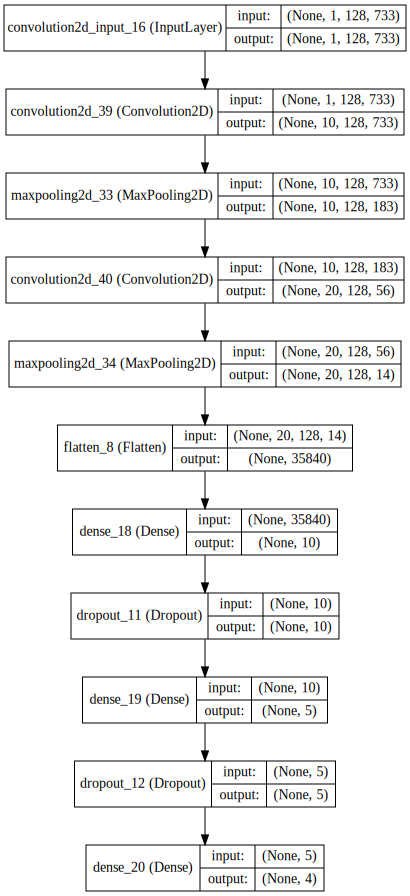

In [92]:
SVG(model_to_dot(model, show_layer_names=True, show_shapes=True).create(prog='dot', format='svg'))

In [62]:
Xnew = np.concatenate((X[:25], X[200:225]))
Xnew = np.concatenate((Xnew, X[400:425]))
Xnew = np.concatenate((Xnew, X[600:625]))

In [64]:
ynew = np.concatenate((np.array([[1,0,0,0],]*25), np.array([[0,1,0,0],]*25)))
ynew = np.concatenate((ynew, np.array([[0,0,1,0],]*25)))
ynew = np.concatenate((ynew, np.array([[0,0,0,1],]*25)))

In [53]:
def shuffle(x, y, samplesCount):
    indexes = np.arange(samplesCount)
    np.random.shuffle(indexes)
    x_shuffeled = np.array(x)
    y_shuffeled = np.array(y)


    for i in range(len(x)):
        x_shuffeled[i] = x[indexes[i]]
        y_shuffeled[i] = y[indexes[i]]

    return x_shuffeled, y_shuffeled

In [93]:
X, y = shuffle(Xnew, ynew, 100)

In [94]:
countInTrain = 100
model.fit(X.reshape(100, 1, 128, 733), y.reshape(100, 4),\
          batch_size=10, nb_epoch=100, validation_split=0.0, show_accuracy=True, shuffle=True, verbose=1)

Epoch 1/100
100/100 [==============================] - 1s - loss: 1.3811 - acc: 0.2000     
Epoch 2/100
100/100 [==============================] - 1s - loss: 1.3716 - acc: 0.2600     
Epoch 3/100
100/100 [==============================] - 1s - loss: 1.3628 - acc: 0.3000     
Epoch 4/100
100/100 [==============================] - 1s - loss: 1.3868 - acc: 0.2100     
Epoch 5/100
100/100 [==============================] - 1s - loss: 1.3608 - acc: 0.2800     
Epoch 6/100
100/100 [==============================] - 1s - loss: 1.3748 - acc: 0.2800     
Epoch 7/100
100/100 [==============================] - 1s - loss: 1.3880 - acc: 0.3100     
Epoch 8/100
100/100 [==============================] - 1s - loss: 1.3723 - acc: 0.2900     
Epoch 9/100
100/100 [==============================] - 1s - loss: 1.3741 - acc: 0.2900     
Epoch 10/100
100/100 [==============================] - 1s - loss: 1.3561 - acc: 0.3100     
Epoch 11/100
100/100 [==============================] - 1s - loss: 1.3611 - acc

In [96]:
def SetMaxProbabilityToOne(array):
    return map(lambda x: 1 if(x == max(array)) else 0, array)

pred = model.predict(X.reshape(100, 1, 128, 733))

original = y[:countInTrain]
predict = pred[:countInTrain]
countTrue = 0

#original = y[countInTrain:samplesCount]
#predict = pred[countInTrain:samplesCount]
for i in range(len(predict)):
    predict[i] = SetMaxProbabilityToOne(predict[i])
    countTrue += 1 if (sum(predict[i] == original[i]) == nclasses) else 0
print countTrue / len(predict)

0.71


In [69]:
test = X.reshape(samplesCount, 1, 733, 128)

In [70]:
import matplotlib.pyplot as plt
import matplotlib.style as ms
ms.use('seaborn-muted')
%matplotlib inline

import IPython.display

import librosa
import librosa.display

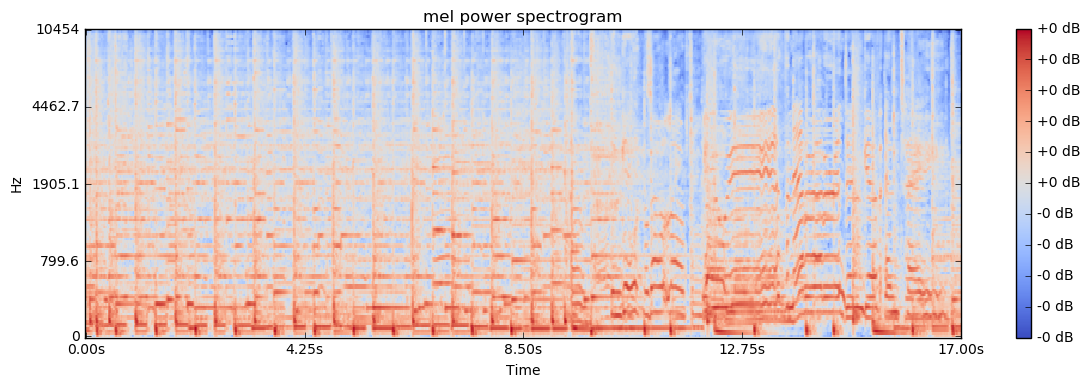

In [73]:
sr = 22050
log_S = X[428]
plt.figure(figsize=(12,4))
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')
plt.title('mel power spectrogram')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()

In [75]:
X[428]

array([[ 0.18903403,  0.12142453, -0.04967084, ...,  0.15417257,
         0.13544442,  0.09841888],
       [ 0.25373269,  0.2085364 ,  0.18807613, ...,  0.21316616,
         0.2155649 ,  0.17364668],
       [ 0.36993769,  0.36644145,  0.35492474, ...,  0.30950596,
         0.32040547,  0.29752975],
       ..., 
       [-0.18873992, -0.15029682, -0.0692722 , ..., -0.39383789,
        -0.33790772, -0.25286059],
       [-0.20627563, -0.18309608, -0.1420332 , ..., -0.45375083,
        -0.33119153, -0.23907982],
       [-0.2584566 , -0.26971508, -0.22204784, ..., -0.5       ,
        -0.41493445, -0.32227585]])

In [76]:
X[428].shape

(128, 733)

In [77]:
X[428].reshape(733, 128)

array([[ 0.18903403,  0.12142453, -0.04967084, ...,  0.23267171,
         0.26003603,  0.21114181],
       [ 0.1733117 ,  0.1673964 ,  0.09375144, ..., -0.01797439,
        -0.02924239, -0.03762035],
       [ 0.0788986 ,  0.23640819,  0.28168606, ...,  0.04409743,
         0.04834659,  0.06605238],
       ..., 
       [-0.43320768, -0.43562421, -0.3955075 , ..., -0.45366129,
        -0.5       , -0.5       ],
       [-0.47463818, -0.47690622, -0.42709871, ..., -0.41233475,
        -0.38772253, -0.35423488],
       [-0.33061285, -0.30811207, -0.36199171, ..., -0.5       ,
        -0.41493445, -0.32227585]])